Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Attribute Information:

Only 14 attributes used: 1. #3 (age) 2. #4 (sex) 3. #9 (cp) 4. #10 (trestbps) 5. #12 (chol) 6. #16 (fbs) 7. #19 (restecg) 8. #32 (thalach) 9. #38 (exang) 10. #40 (oldpeak) 11. #41 (slope) 12. #44 (ca) 13. #51 (thal) 14. #58 (num) (the predicted attribute)

Columns:
    age:age in years
    sex:(1 = male; 0 = female)
    cp:chest pain type
    trestbps:resting blood pressure (in mm Hg on admission to the hospital)
    chol:serum cholestoral in mg/dl
    fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg:resting electrocardiographic results
    thalach:maximum heart rate achieved
    exang:exercise induced angina (1 = yes; 0 = no)
    oldpeak:ST depression induced by exercise relative to rest
    slope:the slope of the peak exercise ST segment
    ca:number of major vessels (0-3) colored by flourosopy
    thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
    target:1 or 0 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart-disease-uci']


Loading the data into dataframe

In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

Viewing the data

In [3]:
#Once the data is loaded,we can view the data. Instead of viewing the entire data , we can view the first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# We can view the last five rows of the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Viewing the size of the data (no of rows and no of columns)

In [5]:
#we can view the total number of rows and columns of data
df.shape

(303, 14)

Understanding the column attributes - datatype , no of non null rows

In [6]:
# Now we got the information about the total size of the data . We can further explore the detailed information about each column using the info method on datadrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The ProfileReport() method gives detailed data summary statistics 

In [7]:
profile = pp.ProfileReport(df)
profile

In [8]:
# We can get the summary statistics (min,max,count...) of each column by using the describe() method
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Checking the column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# Rename the columns of dataframe to more meaningful
df=df.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [11]:
#Recheck the column names
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [12]:
# Check for missing values
#df.isnull().sum()
df.isnull().mean()

Age         0.0
Sex         0.0
Cp          0.0
Trestbps    0.0
Chol        0.0
Fbs         0.0
Restecg     0.0
Thalach     0.0
Exang       0.0
Oldpeak     0.0
Slope       0.0
Ca          0.0
Thal        0.0
Target      0.0
dtype: float64

Detecting the Outliers

In [13]:
# Calculating the IQR for entire dataset, to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age         13.5
Sex          1.0
Cp           2.0
Trestbps    20.0
Chol        63.5
Fbs          0.0
Restecg      1.0
Thalach     32.5
Exang        1.0
Oldpeak      1.6
Slope        1.0
Ca           1.0
Thal         1.0
Target       1.0
dtype: float64


In [14]:
# Filtering the columns by removing the outliers
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))  )

       Age    Sex     Cp  Trestbps   Chol    Fbs  Restecg  Thalach  Exang  \
0    False  False  False     False  False   True    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False   True    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     Oldpeak  Slope     Ca   Thal  Target  
0      False  False  False  Fal

In [15]:
# Try to delete the rows with outliers and check if this impacts our prediction
df_out = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))] #viewing the outliers
print(df_out)
#df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

     Age  Sex  Cp  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  \
0    NaN  NaN NaN       NaN   NaN  1.0      NaN      NaN    NaN      NaN   
1    NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
2    NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
3    NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
4    NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
299  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
300  NaN  NaN NaN       NaN   NaN  1.0      NaN      NaN    NaN      NaN   
301  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
302  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   

     Slope  Ca  Thal  Target  
0      NaN NaN   NaN     NaN  
1      NaN NaN   NaN     

In [16]:
#df_out.shape # We can see that by deleting the rows with outliers , we may lose a large amount of data

In [17]:
# We will now try perform imputation on these outliers , As all columns are numerical we can perform median imputation
#df.out = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

Identifying the duplicated values

In [18]:
# We will try to check and drop duplicate values
#Incase of duplicate rows we use drop_duplicates() method
df_dup = df[df.duplicated()]
df_dup

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
#As we have one duplicate row , Delete the duplicated rows
df = df.drop_duplicates()
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [20]:
df['Target'].value_counts()

1    164
0    138
Name: Target, dtype: int64

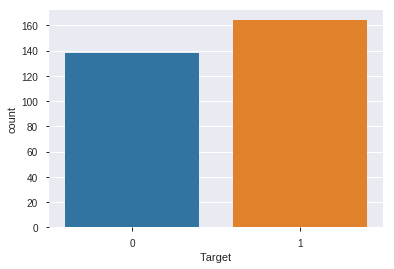

In [21]:
sns.countplot(df['Target'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc785fc4c18>,
      dtype=object)

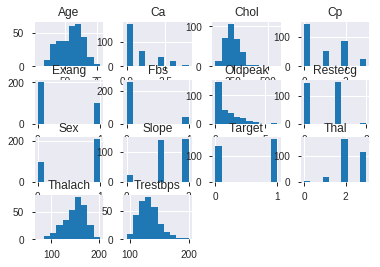

In [22]:
df.hist()

Converting the categorical variables

In [23]:
dataset = pd.get_dummies(df, columns = ['Sex', 'Cp', 'Fbs', 'Restecg', 'Exang', 'Slope', 'Ca', 'Thal'])

Performing Feature Scaling

In [24]:
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [25]:
df.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [26]:
y = df['Target']
X = df.drop(['Target'], axis = 1)

Logistic Regression

In [27]:
logreg = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("The Score is",logreg.score(X_test,y_test))
cv_score_five = cross_val_score(logreg,X,y,cv=5)
cv_score_ten = cross_val_score(logreg,X,y,cv=10)
print("Cross validation score - Five Folds",cv_score_five)
print("Cross validation score - Ten Folds",cv_score_ten)
print("Mean cross validation score",cv_score_ten.mean())
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

The Score is 0.8429752066115702
Cross validation score - Five Folds [0.81967213 0.8852459  0.85245902 0.85       0.74576271]
Cross validation score - Ten Folds [0.87096774 0.77419355 0.87096774 0.87096774 0.9        0.76666667
 0.86666667 0.9        0.68965517 0.75862069]
Mean cross validation score 0.8268705969595848
Confusion Matrix [[43  9]
 [10 59]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        52
           1       0.87      0.86      0.86        69

    accuracy                           0.84       121
   macro avg       0.84      0.84      0.84       121
weighted avg       0.84      0.84      0.84       121



Decision Tree Classfier

In [28]:
dec_clf = DecisionTreeClassifier(max_depth = 3 , random_state=1)
dec_clf.fit(X_train,y_train)
y_pred = dec_clf.predict(X_test)
print("The accuarcy score of decision tree classifier is ",accuracy_score(y_test,y_pred))
cv_dec_tree_clf = cross_val_score(dec_clf,X,y,cv=10)
print("The Cross validation score ",cv_dec_tree_clf.mean())

The accuarcy score of decision tree classifier is  0.8429752066115702
The Cross validation score  0.8069929551353356


Random Forest Classifier

In [29]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print(score.mean())

0.8337745643307379
